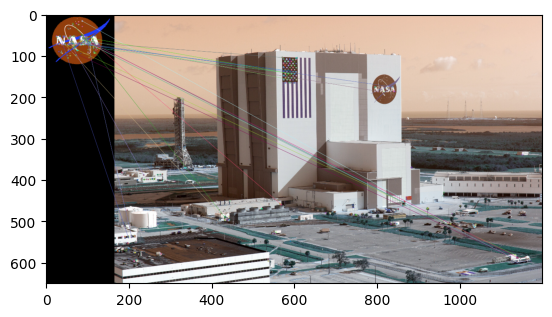

(<matplotlib.image.AxesImage at 0x260971c1ff0>, None)

In [2]:
import numpy as np 
import cv2 
from matplotlib import pyplot as plt

#download gambar query di https://i.im.ge/2021/09/24/TCbVi1.png
#download gambar training di https://i.im.ge/2021/09/24/TCbfbf.jpg
# Read the training and query images
query_img = cv2.imread('gambar/nasa.png') 
train_img = cv2.imread('gambar/kennedy_space_center.jpg') 
 
# Convert the images to grayscale 
query_img_gray = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY) 
train_img_gray = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY) 
 
# Initialize the ORB detector algorithm 
orb = cv2.ORB_create() 
 
# Detect keypoints (features) cand calculate the descriptors
query_keypoints, query_descriptors = orb.detectAndCompute(query_img_gray,None) 
train_keypoints, train_descriptors = orb.detectAndCompute(train_img_gray,None) 
 
# Match the keypoints
matcher = cv2.BFMatcher() 
matches = matcher.match(query_descriptors,train_descriptors) 
 
# Draw the keypoint matches on the output image
output_img = cv2.drawMatches(query_img, query_keypoints, 
train_img, train_keypoints, matches[:20],None) 
 
output_img = cv2.resize(output_img, (1200,650)) 
 
# Save the final image 
cv2.imwrite("feature_matching_result.jpg", output_img) 

cv2.imshow('Feature matching dengan Brute force', output_img)
#plt.imshow(output_img),plt.show()

# Close OpenCV upon keypress
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(output_img),plt.show()
